In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

Identity Diagonal Matrix

In [2]:
A = np.eye(5)

In [3]:
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Loading data

In [101]:
df = pd.read_csv('machine-learning-ex1/ex1/ex1data1.txt', header=None)
df.columns = ['Population', 'Profit']
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Scatter Plot

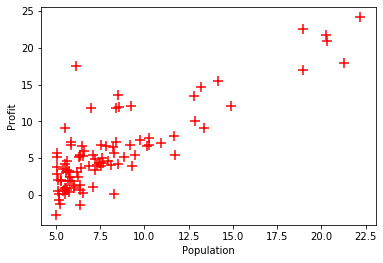

In [102]:
df.plot.scatter(x='Population', y='Profit',c='red',marker='+', s = 100);


# Gradient descent with 1 feature 

Adding column of ones to X

In [103]:
df.insert(loc=0, column='Ones', value=1)

Initialize Theta as vector of zeros

In [104]:
theta = np.zeros((2,1))

In [105]:
theta

array([[0.],
       [0.]])

For gradient descent we need to initialize number of iterations and learning rate

In [9]:
iterations = 1500
alpha = 0.01

Now we need to define function, that will count error on each iteration on all batch of examples

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta x^{(i)} - y^{(i)})^2$$
$$h_\theta (x) = \theta^T x = \theta_0 + \theta_1 x$$

In [10]:
def computeCost(X, y, theta):
    m = y.shape[0]
    h = np.dot(X,theta) #prediction
    J = ((h - y)**2).sum()/(2*m)
    return J

def computeCost_SK(X, y, theta):
    m = y.shape[0]
    h = np.dot(X,theta) #prediction
    J = mean_squared_error(h, y)/2
    return J

In [11]:
computeCost(df[['Ones', 'Population']],df[['Profit']], theta)

Profit    32.072734
dtype: float64

In [12]:
computeCost(df[['Ones', 'Population']],df[['Profit']], [[-1], [2]])

Profit    54.242455
dtype: float64

In [13]:
computeCost_SK(df[['Ones', 'Population']],df[['Profit']], [[-1], [2]])

54.24245508201238

Now we are going to implement gradient descent. We are going to update theta according to derivative by each feature
$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^{(i)})-y^{(i)}) x_j^{(i)}$$

In [14]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - (alpha/m)*np.dot(np.transpose(X),(h-y))
        J_history[i] = computeCost_SK(X, y, theta);
    return [theta, J_history] 

In [15]:
t = (gradientDescent(df[['Ones', 'Population']],df[['Profit']], theta, alpha, iterations))

In [16]:
t[0]

array([[-3.63029144],
       [ 1.16636235]])

Visualize our predict model

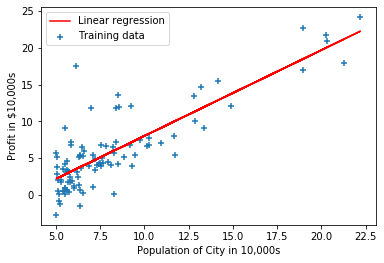

In [17]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Population'], df['Profit'], marker='+', label = 'Training data')
plt.plot(df['Population'], np.dot(df[['Ones','Population']], t[0]), c='r', label ='Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()
#df.plot.scatter(x='Population', y='Profit',c='red',marker='+', s = 100);



Visualizing J on 3d surface

In [18]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)));


In [19]:
# Fill out J_vals
X = df[['Ones', 'Population']]
y = df['Profit']
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):  
        tt = [theta0_vals[i], theta1_vals[j]]
        J_vals[i,j] = computeCost(X, y, tt)


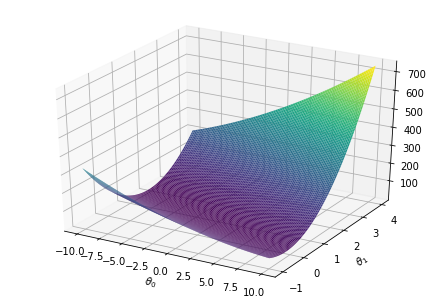

In [20]:
from matplotlib import cm
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
J_vals = np.transpose(J_vals)
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1, cmap=cm.viridis)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')


plt.show()

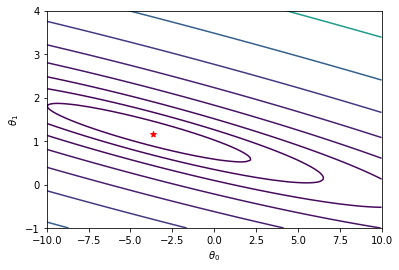

In [21]:
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.scatter(t[0][0], t[0][1], c='r', marker = '*')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')



plt.show()


# Housing exaple - multi features

In [106]:
df1 = pd.read_csv('machine-learning-ex1/ex1/ex1data2.txt', header=None)
df1.columns = ['Size', 'Bedroom', 'Price']
df1.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Normalize features

In [56]:
mu = df1[['Size', 'Bedroom']].mean()
sigma = df1[['Size', 'Bedroom']].std()
X_norm = (df1[['Size', 'Bedroom']]- df1[['Size', 'Bedroom']].mean())/df1[['Size', 'Bedroom']].std()
X_norm.head()
# or min max normalization
# (df1[['Size', 'Bedroom']]- df1[['Size', 'Bedroom']].mean())/(df1[['Size', 'Bedroom']].max()-df1[['Size', 'Bedroom']].min())

,Size,Bedroom
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


Sklearn library normalisation StandardScaler and MinMaxScaler

In [57]:
from sklearn import preprocessing

x = df1[['Size', 'Bedroom']].values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x_norm_SK = pd.DataFrame(x_scaled)
x_norm_SK.columns = ['Size', 'Bedroom']
x_norm_SK.head()

,Size,Bedroom
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


### Create column with ones

In [58]:
X_norm.insert(loc=0, column='Ones', value=1);

#### starting the same pfocess of counting error on each iteration and prosceding gradient descent. We can use already created function as it is in vectorized form

In [96]:
alpha = 0.01;
num_iters = 400;
theta = np.zeros((3, 1));
multi_1 = (gradientDescent(X_norm,df1[['Price']], theta, alpha, num_iters)) 

In [98]:
multi_1[0]

array([[334302.06399328],
       [100087.11600585],
       [  3673.54845093]])

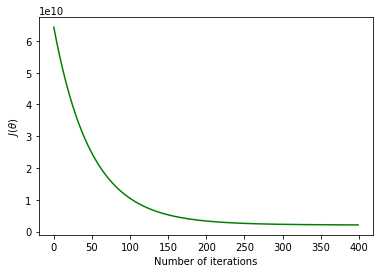

In [99]:
plt.plot(range(num_iters),multi_1[1], c='g')
plt.xlabel('Number of iterations')
plt.ylabel(r'$J(\theta)$')
plt.show()

#### Trying different learning rates

In [77]:
alphas = [0.0001, 0.003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]

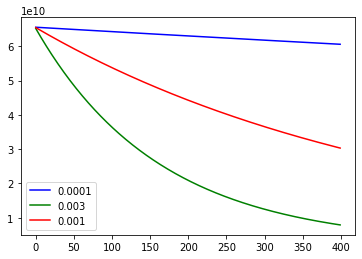

In [80]:
colors = 'rgbcmykrgb'
indexes = len(alphas)-1

for alpha in alphas[:3]:
    theta = np.zeros((3, 1))
    multi = (gradientDescent(X_norm,df1[['Price']], theta, alpha, num_iters)) 
    plt.plot(range(num_iters),multi[1], c=colors[indexes], label=str(alpha))
    plt.legend()
    indexes -= 1
plt.show()

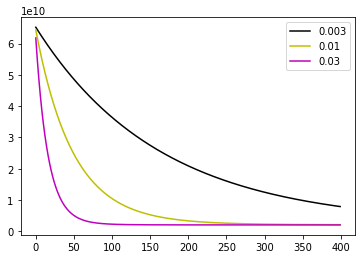

In [81]:
for alpha in alphas[3:6]:
    theta = np.zeros((3, 1))
    multi = (gradientDescent(X_norm,df1[['Price']], theta, alpha, num_iters)) 
    plt.plot(range(num_iters),multi[1], c=colors[indexes], label=str(alpha))
    plt.legend()
    indexes -= 1
plt.show()

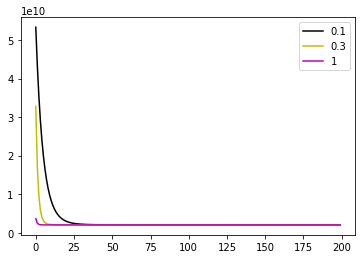

In [85]:
for alpha in alphas[6:9]:
    theta = np.zeros((3, 1))
    multi = (gradientDescent(X_norm,df1[['Price']], theta, alpha, num_iters)) 
    plt.plot(range(num_iters-200),multi[1][:200], c=colors[indexes], label=str(alpha))
    plt.legend()
    indexes -= 1
plt.show()

## Normal equation

###### we dont need to use normalized features as we use Normal equation for finding ideal theta

$$\theta = (X^T * X)^{-1} X^t * y$$

In [88]:
X = df1[['Size', 'Bedroom']]
y = df1[['Price']]
X.insert(loc=0, column='Ones', value=1);

In [93]:
nnn = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), y))

In [ ]:
 89597.909542
 139.210674
 -8738.019112


In [107]:
nnn

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [95]:
np.dot([1, 1650, 3],nnn)

array([293081.46433489])

In [100]:
np.dot([1, 1650, 3],multi_1[0])

array([1.65489064e+08])

In [ ]:
array([[334302.06399328],
       [100087.11600585],
       [  3673.54845093]])